# Keras Sequential Exercise Solution MNIST Hand written digits

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras

Using TensorFlow backend.


In [2]:
digits = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = digits.load_data()

11493376/11490434 [==============================] - 12s 1us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

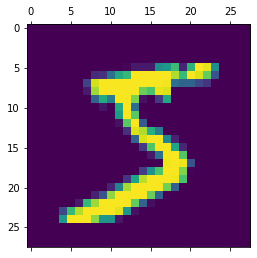

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0] # our target value for this image

5

In [8]:
X_train=X_train/255                  # Normalizing
X_test=X_test/255

In [9]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

In [10]:
model = Sequential()   # Creating sequential model

In [11]:
model.add(Flatten(input_shape=[28, 28]))   # Adding Layer
                                           # Flatten converting 2D array to 1D array

In [12]:
model.add(Dense(100, activation="relu"))     # Hidden Layer with trial and error process

In [13]:
model.add(Dense(10, activation="softmax"))   # Output Layers, which is 10 categories in this case
                                             # Softmax distributing set of numbers to probablities of available classes

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compiling model
model.compile(loss="sparse_categorical_crossentropy", # Loss function
              optimizer="adam",                       # Optimizer helps to adjust weight of edges
              metrics=["accuracy"])                   # type of mtrics using during training

In [16]:
model.fit(X_train, y_train, epochs=5)  # Epochs is number of iteration

Epoch 1/5
60000/60000 [==============================] - 7s 110us/step - loss: 0.2731 - accuracy: 0.9222
Epoch 2/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.1252 - accuracy: 0.9628
Epoch 3/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.0893 - accuracy: 0.9732
Epoch 4/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.0679 - accuracy: 0.9789
Epoch 5/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.0532 - accuracy: 0.9840


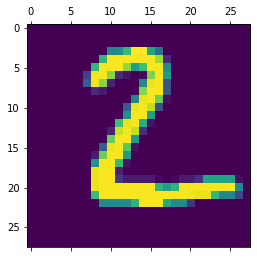

In [17]:
plt.matshow(X_test[1])

In [18]:
yp=model.predict(X_test)     # y prediction for our entire test dataset

In [21]:
yp[1]                 # this is showing probabilities of our 10 categories(0,1,2,3...9)

array([5.9830818e-08, 2.0922758e-03, 9.9783498e-01, 6.4483953e-05,
       1.3874319e-12, 5.0804542e-06, 7.5198722e-07, 1.1637856e-10,
       2.3654309e-06, 3.5616556e-14], dtype=float32)

In [22]:
np.argmax(yp[1]) # This numpy function returns the highest value index

2

In [24]:
model.evaluate(X_test,y_test)   # first one is loss function value, 2nd one is accuracy
                                # We can increase this accuracy by adjusting neuron

10000/10000 [==============================] - 0s 33us/step


[0.0820050229919143, 0.9761999845504761]